# Wrangling and Analyzing WeRateDogs Twitter Account (DAND project)
Abdullah Almuzaini

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Gathering](#Gathering)
- [Part II - Data Assessment](#Assessment)
- [Part III - Data Cleaning](#cleaning)
- [Part IV - Datat Storing](#store)
- [Part V - Analyzing and Visualizing Data](#A&VD)
- [Part VI - Refrences](#refrences)

<a id='intro'></a>
# Introduction 

Data wrangling is a fundamental skill every data analyst should acquire simply because data is almost always is not clean and needs countless time to prepare it for an analysis project involving. In fact, wrangling data is a necessary process before beginning analyzing data. The reason is that when data is not wrangled well, it would be negatively reflected on the analysis outcomes. 

In this project, I will gather the data from a few different sources, and it will be in three different formats. After collecting the data, I will try to inspect it, looking for quality and tidiness issues using various available methods, including visual and programmatical assessments. Then, I will go through the cleaning process to fix the issues addressed in the assessment stage. Last but not least, I will store the data in the current working directory in the format of `CSV,` and the data will be ready for the next step. Finally, I will analyze the data we have, extracting some insights and meanings hidden in the data. 

The dataset that I will be wrangling, then analyzing and visualizing is the tweet archive of Twitter user <a href="https://twitter.com/dog_rates">@dog_rates</a>, also known as <a href="https://en.wikipedia.org/wiki/WeRateDogs">WeRateDogs</a>. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.  


<a id='Gathering'></a>
# Part I - Data Gathering

> Gathering the Pieces of datasets required for the project. In this case, three datasets will be fetched and downloaded into the notebook
> The three datasets are:
>    - I will download WeRateDogs Twitter account archive, which is hosted on Udacity server on this <a herf="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv"> link</a> as `csv` format. I will use the Python requests library to download the dataset.
>    - The tweet image predictions, which is also hosted on Udacity server on this <a herf = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"> link</a> formatted as `tsv`. I will use the Python requests library to download the dataset.
>    - The other data I will be gathering is the tweets' retweet counts and favorite counts for each tweet in the two datasets I gathered in the previous steps. I will use tweetpy API to go through WeRateDogs twitter's account, extract the retweet and favorite counts of each tweet, and store them in a new dataset.




#### Importing the necessary libraries

In [1]:
import requests
import os
import pandas as pd
import tweepy
import json
from tqdm import tqdm
pd.set_option('display.max_rows', None, 'display.max_columns',None)
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

### Below cell contains two functions:
> - new_folder() to create new folder
> - get_files() to download files from the internet programmticly 




In [2]:

def new_folder(folder_name): 
    """
    this funcation creates a new directory in the currnet running directory when it's called
    """
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)


def get_files(file_name, url):
    """
    The following function download any file from the internet using requests library and save it in the 'dataset' directory. 
    note about the file_name: 
    the file_name var has to include the file format


    """ 
    response = requests.get(url)
    with open(os.path.join('dataset', url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)


In [3]:
# Create a new folder if it does not exist 
new_folder('dataset')

In [4]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'

data = get_files(file_name = "twitter-archive-enhanced.csv", url= URL  )
df = pd.read_csv('dataset'+ '/'+'twitter-archive-enhanced.csv', parse_dates=True)
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [5]:
# The URL to `image-predictions.tsv` dataset

URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Download the dataset 

data = get_files(file_name = "image-predictions.tsv", url= URL)

# Read the dataset in pandas DataFrame
img_pred = pd.read_csv('dataset/image-predictions.tsv', sep='\t')
img_pred.head()


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [6]:
img_pred.shape

(2075, 12)

### Setting up tweetpy 

In [7]:
# Twitter Credentials
with open('twitter/twitter.txt','r') as twtt:


    ACCESS_TOKEN = str(twtt.readline()).strip()
    ACCESS_TOKEN_SECRET = str(twtt.readline()).strip()
    CONSUMER_KEY = str(twtt.readline()).strip()
    CONSUMER_SECRET = str(twtt.readline()).strip()

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [103]:
# Test the api
tweet = api.get_status(677187300187611136)
print(tweet.user.screen_name)

dog_rates


> #### The following block of code will collect three pieces of data about each tweet
> and these pieces of data are:
>    - tweet_id (will be brought from 'twitter-archive-enhanced.csv'
>    - retweet_count (will be collected using tweetpy.api)
>    - favorite_count (will be collected using tweetpy.api)

> #### These pieces of data will be added to a dict var in order to save them in json format


In [58]:
data = {}
data['tweet_info']=  []
for i in tqdm(df['tweet_id']):
    try:
        tweet = api.get_status(i)
        data['tweet_info'].append({
            'tweet_id' : i ,
            'retweet_count': tweet.retweet_count ,
            'likes_count' : tweet.favorite_count
        })
    except:
        print("The tweet associated to the tweet id", i," was not found")


  1%|          | 21/2356 [00:04<09:14,  4.21it/s]

The tweet associated to the tweet id 888202515573088257  was not found


  4%|▍         | 97/2356 [00:18<07:07,  5.28it/s]

The tweet associated to the tweet id 873697596434513921  was not found


  4%|▍         | 103/2356 [00:19<06:31,  5.75it/s]

The tweet associated to the tweet id 872668790621863937  was not found


  4%|▍         | 106/2356 [00:19<06:12,  6.05it/s]

The tweet associated to the tweet id 872261713294495745  was not found


  5%|▌         | 120/2356 [00:22<07:00,  5.32it/s]

The tweet associated to the tweet id 869988702071779329  was not found


  6%|▌         | 134/2356 [00:24<06:46,  5.47it/s]

The tweet associated to the tweet id 866816280283807744  was not found


  7%|▋         | 157/2356 [00:28<06:01,  6.08it/s]

The tweet associated to the tweet id 861769973181624320  was not found


  8%|▊         | 183/2356 [00:35<13:02,  2.78it/s]

The tweet associated to the tweet id 856602993587888130  was not found


  8%|▊         | 187/2356 [00:36<11:39,  3.10it/s]

The tweet associated to the tweet id 856330835276025856  was not found


  9%|▉         | 213/2356 [00:41<06:08,  5.82it/s]

The tweet associated to the tweet id 851953902622658560  was not found


 11%|█         | 249/2356 [00:47<06:38,  5.28it/s]

The tweet associated to the tweet id 845459076796616705  was not found


 11%|█         | 255/2356 [00:48<05:42,  6.14it/s]

The tweet associated to the tweet id 844704788403113984  was not found


 11%|█         | 262/2356 [00:49<05:55,  5.89it/s]

The tweet associated to the tweet id 842892208864923648  was not found


 13%|█▎        | 298/2356 [00:56<05:36,  6.11it/s]

The tweet associated to the tweet id 837366284874571778  was not found


 13%|█▎        | 300/2356 [00:56<05:45,  5.94it/s]

The tweet associated to the tweet id 837012587749474308  was not found


 15%|█▌        | 365/2356 [01:08<05:28,  6.06it/s]

The tweet associated to the tweet id 829374341691346946  was not found


 16%|█▋        | 384/2356 [01:12<06:34,  5.00it/s]

The tweet associated to the tweet id 827228250799742977  was not found


 22%|██▏       | 508/2356 [01:34<05:08,  5.98it/s]

The tweet associated to the tweet id 812747805718642688  was not found


 24%|██▍       | 568/2356 [01:46<04:54,  6.08it/s]

The tweet associated to the tweet id 802247111496568832  was not found


 32%|███▏      | 752/2356 [02:19<04:31,  5.90it/s]

The tweet associated to the tweet id 779123168116150273  was not found


 33%|███▎      | 786/2356 [02:26<05:02,  5.19it/s]

The tweet associated to the tweet id 775096608509886464  was not found


 35%|███▍      | 817/2356 [02:31<04:15,  6.02it/s]

The tweet associated to the tweet id 771004394259247104  was not found


 35%|███▍      | 820/2356 [02:32<05:09,  4.96it/s]

The tweet associated to the tweet id 770743923962707968  was not found


 36%|███▌      | 843/2356 [02:36<04:20,  5.80it/s]

The tweet associated to the tweet id 766864461642756096  was not found


 38%|███▊      | 889/2356 [02:44<04:10,  5.85it/s]

The tweet associated to the tweet id 759923798737051648  was not found


 38%|███▊      | 892/2356 [02:44<04:12,  5.80it/s]

The tweet associated to the tweet id 759566828574212096  was not found


 40%|███▉      | 934/2356 [15:11<04:07,  5.74it/s]    

The tweet associated to the tweet id 754011816964026368  was not found


 73%|███████▎  | 1727/2356 [17:37<01:41,  6.20it/s]

The tweet associated to the tweet id 680055455951884288  was not found


100%|██████████| 2356/2356 [31:53<00:00,  1.23it/s]    


In [8]:
# Create a text file in the current directory and save each tweet's retweet count and favorite ("like") count
# in text file as json format

with open('tweet_json1.txt', 'w') as outfile:
    json.dump(data, outfile)

> ### Below, I will load "tweet_json.txt" into the notebook and print it out to see how it looks

In [9]:
# Read 'tweet.txt' line by line
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for p in data['tweet_info']:
        print('Tweet id: ' , p['tweet_id'])
        print('Retweet count: ' , p['retweet_count'])
        print('Likes count: ' , p['likes_count'])
        print('')

Tweet id:  892420643555336193
Retweet count:  7189
Likes count:  34531

Tweet id:  892177421306343426
Retweet count:  5396
Likes count:  29940

Tweet id:  891815181378084864
Retweet count:  3562
Likes count:  22530

Tweet id:  891689557279858688
Retweet count:  7413
Likes count:  37769

Tweet id:  891327558926688256
Retweet count:  7947
Likes count:  36071

Tweet id:  891087950875897856
Retweet count:  2672
Likes count:  18197

Tweet id:  890971913173991426
Retweet count:  1715
Likes count:  10603

Tweet id:  890729181411237888
Retweet count:  16176
Likes count:  58118

Tweet id:  890609185150312448
Retweet count:  3712
Likes count:  25055

Tweet id:  890240255349198849
Retweet count:  6247
Likes count:  28574

Tweet id:  890006608113172480
Retweet count:  6296
Likes count:  27595

Tweet id:  889880896479866881
Retweet count:  4274
Likes count:  25085

Tweet id:  889665388333682689
Retweet count:  8560
Likes count:  42978

Tweet id:  889638837579907072
Retweet count:  3818
Likes count:


Tweet id:  838201503651401729
Retweet count:  9442
Likes count:  0

Tweet id:  838150277551247360
Retweet count:  313
Likes count:  1596

Tweet id:  838085839343206401
Retweet count:  1
Likes count:  134

Tweet id:  838083903487373313
Retweet count:  2920
Likes count:  16870

Tweet id:  837820167694528512
Retweet count:  7353
Likes count:  32564

Tweet id:  837482249356513284
Retweet count:  417
Likes count:  3693

Tweet id:  837471256429613056
Retweet count:  2119
Likes count:  12259

Tweet id:  837110210464448512
Retweet count:  2228
Likes count:  15411

Tweet id:  836989968035819520
Retweet count:  2168
Likes count:  12238

Tweet id:  836753516572119041
Retweet count:  4363
Likes count:  18538

Tweet id:  836677758902222849
Retweet count:  2083
Likes count:  12112

Tweet id:  836648853927522308
Retweet count:  519
Likes count:  0

Tweet id:  836397794269200385
Retweet count:  25817
Likes count:  0

Tweet id:  836380477523124226
Retweet count:  2816
Likes count:  14189

Tweet id:  8


Tweet id:  809808892968534016
Retweet count:  4696
Likes count:  0

Tweet id:  809448704142938112
Retweet count:  1407
Likes count:  6749

Tweet id:  809220051211603969
Retweet count:  5378
Likes count:  19316

Tweet id:  809084759137812480
Retweet count:  3400
Likes count:  12833

Tweet id:  808838249661788160
Retweet count:  2928
Likes count:  9852

Tweet id:  808733504066486276
Retweet count:  2078
Likes count:  7679

Tweet id:  808501579447930884
Retweet count:  2499
Likes count:  11001

Tweet id:  808344865868283904
Retweet count:  19979
Likes count:  41146

Tweet id:  808134635716833280
Retweet count:  5662
Likes count:  0

Tweet id:  808106460588765185
Retweet count:  2122
Likes count:  8576

Tweet id:  808001312164028416
Retweet count:  3396
Likes count:  12160

Tweet id:  807621403335917568
Retweet count:  3474
Likes count:  14174

Tweet id:  807106840509214720
Retweet count:  53070
Likes count:  114430

Tweet id:  807059379405148160
Retweet count:  7060
Likes count:  0

Twee

Retweet count:  7060
Likes count:  23376

Tweet id:  782747134529531904
Retweet count:  1353
Likes count:  7236

Tweet id:  782722598790725632
Retweet count:  5146
Likes count:  16686

Tweet id:  782598640137187329
Retweet count:  1803
Likes count:  7558

Tweet id:  782305867769217024
Retweet count:  5293
Likes count:  16091

Tweet id:  782021823840026624
Retweet count:  5920
Likes count:  0

Tweet id:  781955203444699136
Retweet count:  3209
Likes count:  10804

Tweet id:  781661882474196992
Retweet count:  2593
Likes count:  10104

Tweet id:  781655249211752448
Retweet count:  1084
Likes count:  3865

Tweet id:  781524693396357120
Retweet count:  5297
Likes count:  20061

Tweet id:  781308096455073793
Retweet count:  2447
Likes count:  6906

Tweet id:  781251288990355457
Retweet count:  1984
Likes count:  8112

Tweet id:  781163403222056960
Retweet count:  2635
Likes count:  9490

Tweet id:  780931614150983680
Retweet count:  6945
Likes count:  20950

Tweet id:  780858289093574656
Re

Retweet count:  1467
Likes count:  4165

Tweet id:  752568224206688256
Retweet count:  2150
Likes count:  5251

Tweet id:  752519690950500352
Retweet count:  3242
Likes count:  7026

Tweet id:  752334515931054080
Retweet count:  1033
Likes count:  3663

Tweet id:  752309394570878976
Retweet count:  15283
Likes count:  0

Tweet id:  752173152931807232
Retweet count:  1724
Likes count:  5685

Tweet id:  751950017322246144
Retweet count:  859
Likes count:  2916

Tweet id:  751937170840121344
Retweet count:  1233
Likes count:  4944

Tweet id:  751830394383790080
Retweet count:  1840
Likes count:  5557

Tweet id:  751793661361422336
Retweet count:  2707
Likes count:  5536

Tweet id:  751598357617971201
Retweet count:  2889
Likes count:  7608

Tweet id:  751583847268179968
Retweet count:  1031
Likes count:  4205

Tweet id:  751538714308972544
Retweet count:  1181
Likes count:  4830

Tweet id:  751456908746354688
Retweet count:  944
Likes count:  3078

Tweet id:  751251247299190784
Retweet co

Tweet id:  713177543487135744
Retweet count:  2674
Likes count:  6821

Tweet id:  713175907180089344
Retweet count:  1373
Likes count:  4200

Tweet id:  712809025985978368
Retweet count:  6266
Likes count:  18018

Tweet id:  712717840512598017
Retweet count:  4631
Likes count:  11639

Tweet id:  712668654853337088
Retweet count:  1130
Likes count:  3925

Tweet id:  712438159032893441
Retweet count:  1462
Likes count:  5033

Tweet id:  712309440758808576
Retweet count:  25
Likes count:  223

Tweet id:  712097430750289920
Retweet count:  965
Likes count:  3565

Tweet id:  712092745624633345
Retweet count:  836
Likes count:  2787

Tweet id:  712085617388212225
Retweet count:  458
Likes count:  3095

Tweet id:  712065007010385924
Retweet count:  583
Likes count:  2122

Tweet id:  711998809858043904
Retweet count:  121
Likes count:  0

Tweet id:  711968124745228288
Retweet count:  2150
Likes count:  7607

Tweet id:  711743778164514816
Retweet count:  930
Likes count:  2693

Tweet id:  71173

Likes count:  3395

Tweet id:  690938899477221376
Retweet count:  1808
Likes count:  3864

Tweet id:  690932576555528194
Retweet count:  942
Likes count:  3103

Tweet id:  690735892932222976
Retweet count:  1191
Likes count:  3584

Tweet id:  690728923253055490
Retweet count:  484
Likes count:  2052

Tweet id:  690690673629138944
Retweet count:  772
Likes count:  2211

Tweet id:  690649993829576704
Retweet count:  255
Likes count:  1231

Tweet id:  690607260360429569
Retweet count:  15
Likes count:  286

Tweet id:  690597161306841088
Retweet count:  568
Likes count:  1842

Tweet id:  690400367696297985
Retweet count:  422
Likes count:  1789

Tweet id:  690374419777196032
Retweet count:  794
Likes count:  3063

Tweet id:  690360449368465409
Retweet count:  823
Likes count:  2507

Tweet id:  690348396616552449
Retweet count:  481
Likes count:  1413

Tweet id:  690248561355657216
Retweet count:  387
Likes count:  1588

Tweet id:  690021994562220032
Retweet count:  963
Likes count:  2654



Likes count:  2286

Tweet id:  677547928504967168
Retweet count:  3403
Likes count:  6477

Tweet id:  677530072887205888
Retweet count:  211
Likes count:  990

Tweet id:  677335745548390400
Retweet count:  1609
Likes count:  2837

Tweet id:  677334615166730240
Retweet count:  259
Likes count:  1261

Tweet id:  677331501395156992
Retweet count:  216
Likes count:  1015

Tweet id:  677328882937298944
Retweet count:  1398
Likes count:  3420

Tweet id:  677314812125323265
Retweet count:  485
Likes count:  1548

Tweet id:  677301033169788928
Retweet count:  369
Likes count:  1140

Tweet id:  677269281705472000
Retweet count:  655
Likes count:  1842

Tweet id:  677228873407442944
Retweet count:  1509
Likes count:  3309

Tweet id:  677187300187611136
Retweet count:  840
Likes count:  2545

Tweet id:  676975532580409345
Retweet count:  985
Likes count:  2584

Tweet id:  676957860086095872
Retweet count:  741
Likes count:  2085

Tweet id:  676949632774234114
Retweet count:  367
Likes count:  122

Likes count:  796

Tweet id:  672139350159835138
Retweet count:  628
Likes count:  1592

Tweet id:  672125275208069120
Retweet count:  1028
Likes count:  2169

Tweet id:  672095186491711488
Retweet count:  335
Likes count:  900

Tweet id:  672082170312290304
Retweet count:  331
Likes count:  858

Tweet id:  672068090318987265
Retweet count:  461
Likes count:  1175

Tweet id:  671896809300709376
Retweet count:  3770
Likes count:  7796

Tweet id:  671891728106971137
Retweet count:  508
Likes count:  1200

Tweet id:  671882082306625538
Retweet count:  1252
Likes count:  3198

Tweet id:  671879137494245376
Retweet count:  596
Likes count:  1288

Tweet id:  671874878652489728
Retweet count:  499
Likes count:  1140

Tweet id:  671866342182637568
Retweet count:  438
Likes count:  1027

Tweet id:  671855973984772097
Retweet count:  391
Likes count:  819

Tweet id:  671789708968640512
Retweet count:  3110
Likes count:  6481

Tweet id:  671768281401958400
Retweet count:  446
Likes count:  1085



Retweet count:  80
Likes count:  220

Tweet id:  666983947667116034
Retweet count:  867
Likes count:  2301

Tweet id:  666837028449972224
Retweet count:  485
Likes count:  724

Tweet id:  666835007768551424
Retweet count:  69
Likes count:  188

Tweet id:  666826780179869698
Retweet count:  81
Likes count:  228

Tweet id:  666817836334096384
Retweet count:  223
Likes count:  458

Tweet id:  666804364988780544
Retweet count:  79
Likes count:  210

Tweet id:  666786068205871104
Retweet count:  425
Likes count:  673

Tweet id:  666781792255496192
Retweet count:  171
Likes count:  340

Tweet id:  666776908487630848
Retweet count:  151
Likes count:  310

Tweet id:  666739327293083650
Retweet count:  60
Likes count:  212

Tweet id:  666701168228331520
Retweet count:  189
Likes count:  380

Tweet id:  666691418707132416
Retweet count:  43
Likes count:  164

Tweet id:  666649482315059201
Retweet count:  550
Likes count:  1009

Tweet id:  666644823164719104
Retweet count:  72
Likes count:  213



> #### Convert 'tweet_json.txt' to a pandas dataframe 

In [10]:
# Read 'tweet.txt' line by line into a pandas dataframe with tweet_id, retweet_count, and likes_count
tweet_json_df = pd.json_normalize(data['tweet_info'])


In [11]:
tweet_json_df.head()

tweet_id  retweet_count  likes_count
0  892420643555336193           7189        34531
1  892177421306343426           5396        29940
2  891815181378084864           3562        22530
3  891689557279858688           7413        37769
4  891327558926688256           7947        36071

<a id='Assessment'></a>
# Part II - Data Assessment 

> - #### In this part of my project, I will assess the three datasets I already gathered in the previous part in terms of quality and tidiness.


### Assessing WeRateDogs twitter account archive table



In [12]:
df.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
541   806242860592926720                    NaN                  NaN   
1301  707629649552134146                    NaN                  NaN   
582   800388270626521089                    NaN                  NaN   
506   812747805718642688                    NaN                  NaN   
1718  680176173301628928                    NaN                  NaN   
2044  671533943490011136                    NaN                  NaN   
1778  677895101218201600                    NaN                  NaN   
2207  668627278264475648                    NaN                  NaN   
835   768193404517830656                    NaN                  NaN   
2234  668190681446379520                    NaN                  NaN   
1951  673686845050527744                    NaN                  NaN   
519   810284430598270976                    NaN                  NaN   
1899  674670581682434048                    NaN                  NaN   
1457  695095422348574720                    NaN                  NaN   
1540  689659372465688576                    NaN                  NaN   
533   807621403335917568                    NaN                  NaN   
271   841077006473256960                    NaN                  NaN   
36    885311592912609280                    NaN                  NaN   
1807  676916996760600576                    NaN                  NaN   
129   867421006826221569                    NaN                  NaN   

                      timestamp  \
541   2016-12-06 21:04:11 +0000   
1301  2016-03-09 18:10:30 +0000   
582   2016-11-20 17:20:08 +0000   
506   2016-12-24 19:52:31 +0000   
1718  2015-12-25 00:00:11 +0000   
2044  2015-12-01 03:39:03 +0000   
1778  2015-12-18 16:56:01 +0000   
2207  2015-11-23 03:09:00 +0000   
835   2016-08-23 21:09:14 +0000   
2234  2015-11-21 22:14:07 +0000   
1951  2015-12-07 02:13:55 +0000   
519   2016-12-18 00:43:57 +0000   
1899  2015-12-09 19:22:56 +0000   
1457  2016-02-04 04:03:57 +0000   
1540  2016-01-20 04:03:02 +0000   
533   2016-12-10 16:22:02 +0000   
271   2017-03-13 00:02:39 +0000   
36    2017-07-13 01:35:06 +0000   
1807  2015-12-16 00:09:23 +0000   
129   2017-05-24 16:44:18 +0000   

                                                 source  \
541   <a href="http://twitter.com/download/iphone" r...   
1301  <a href="http://vine.co" rel="nofollow">Vine -...   
582   <a href="http://twitter.com/download/iphone" r...   
506   <a href="http://twitter.com/download/iphone" r...   
1718  <a href="http://twitter.com/download/iphone" r...   
2044  <a href="http://twitter.com/download/iphone" r...   
1778  <a href="http://twitter.com/download/iphone" r...   
2207  <a href="http://twitter.com/download/iphone" r...   
835   <a href="http://twitter.com/download/iphone" r...   
2234  <a href="http://twitter.com/download/iphone" r...   
1951  <a href="http://twitter.com/download/iphone" r...   
519   <a href="http://twitter.com/download/iphone" r...   
1899  <a href="http://twitter.com/download/iphone" r...   
1457  <a href="http://twitter.com/download/iphone" r...   
1540  <a href="http://twitter.com/download/iphone" r...   
533   <a href="http://twitter.com/download/iphone" r...   
271   <a href="http://twitter.com/download/iphone" r...   
36    <a href="http://twitter.com/download/iphone" r...   
1807  <a href="http://vine.co" rel="nofollow">Vine -...   
129   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
541   RT @dog_rates: This is Dave. He's currently in...         7.833346e+17   
1301  We usually don't rate marshmallows but this on...                  NaN   
582   This is Doc. He takes time out of every day to...                  NaN   
506   RT @dog_rates: Meet Sammy. At first I was like...         6.800555e+17   
1718  This pupper is patiently waiting to scare the ...                  NaN   
2044  Super rare dog here. Spiffy mohawk. Sharp

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
df[df['text'].str.contains('RT')].shape[0]

192

In [16]:
df[df.tweet_id ==710609963652087808][['tweet_id','expanded_urls','source']]

tweet_id                  expanded_urls  \
1255  710609963652087808  https://vine.co/v/idaTpwH5TgU   

                                                 source  
1255  <a href="http://vine.co" rel="nofollow">Vine -...

In [17]:
df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [18]:
print(df.duplicated(subset=['expanded_urls']).sum())


137


In [19]:
for i in range(len(df[:1])):
    print(df.text.loc[i])

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU



#### Qaulity

- Missing values in cloumns `reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `doggo`, `floofer`, `pupper`, `puppo`, `expanded_urls`
- `text` comlumn contains retweets 
- `name` comlumn cintains Inappropriate names ["a", "the", "None",'O','all','old']
- Incorrect `expanded_urls` for `tweet_id` 812503143955202048 and 710609963652087808
- Incorrect `source`,`expanded_urls` for `tweet_id` 710609963652087808
- imporper datatypes (`in_reply_to_status_id`, `in_reply_to_user_id`, `timestamp`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- Null values are represented as a string 'None' instead of 'NaN'
- Some tweet ids have invalid `rating_numerator` and `rating_denominator`
- There 137 duplicates

#### Tidiness

- Since we are only interested in looking at orginal tweets, we do not need the following variables(`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`)
- Some recordes in `source` contain has html tags
- Some tweets' texts in `text` column begain with "RT" followed by a twitter account. 
- `doggo` `floofer` `pupper` `puppo`should be in one Column
- Tweet texts contain URLs at the end

### Assessing `img_pred` table

In [20]:
img_pred.sample(20)

tweet_id                                          jpg_url  \
516   676430933382295552  https://pbs.twimg.com/media/CWMqV7WUYAEEClG.jpg   
1469  779056095788752897  https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg   
1345  759159934323924993  https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
398   673680198160809984  https://pbs.twimg.com/media/CVlkid8WoAAqDlB.jpg   
884   698953797952008193  https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg   
227   670374371102445568  https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg   
1840  837820167694528512  https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg   
467   675047298674663426  https://pbs.twimg.com/media/CV4_8FgXAAQOj4S.jpg   
1931  859074603037188101  https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg   
1013  709556954897764353  https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg   
107   667873844930215936  https://pbs.twimg.com/media/CUTDtyGXIAARxus.jpg   
753   688179443353796608  https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg   
1702  817171292965273600  https://pbs.twimg.com/media/C1cs8uAWgAEwbXc.jpg   
563   678021115718029313  https://pbs.twimg.com/media/CWjQm5gXAAA9GkD.jpg   
1983  871879754684805121  https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg   
1537  790698755171364864  https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg   
1288  751205363882532864  https://pbs.twimg.com/media/CmzRRY1WcAEoxwY.jpg   
1919  855851453814013952  https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg   
363   672877615439593473  https://pbs.twimg.com/media/CVaKn75XAAEU09u.jpg   
576   678675843183484930  https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg   

      img_num                     p1   p1_conf  p1_dog  \
516         1       golden_retriever  0.583875    True   
1469        1              Chihuahua  0.721188    True   
1345        1          Irish_terrier  0.254856    True   
398         1                Samoyed  0.989853    True   
884         1      Italian_greyhound  0.382378    True   
227         1       English_springer  0.974936    True   
1840        1       golden_retriever  0.887625    True   
467         1                Samoyed  0.978007    True   
1931        1               revolver  0.190292   False   
1013        2       golden_retriever  0.790026    True   
107         1          common_iguana  0.999647   False   
753         1                 sorrel  0.811520   False   
1702        1       golden_retriever  0.295483    True   
563         1     miniature_pinscher  0.822048    True   
1983        1      Shetland_sheepdog  0.969171    True   
1537        1   Bernese_mountain_dog  0.996541    True   
1288        2     Labrador_retriever  0.947164    True   
1919        1  flat-coated_retriever  0.321676    True   
363         1              Chihuahua  0.412362    True   
576         1                   maze  0.339850   False   

                            p2   p2_conf  p2_dog                           p3  \
516             cocker_spaniel  0.203671    True           Labrador_retriever   
1469               toy_terrier  0.112943    True                       kelpie   
1345                    briard  0.227716    True  soft-coated_wheaten_terrier   
398                 Arctic_fox  0.003344   False                         chow   
884                    redbone  0.102255    True                   shower_cap   
227             English_setter  0.011661    True               cocker_spaniel   
1840        Labrador_retriever  0.068718    True                       kuvasz   
467                       chow  0.007121    True                   Pomeranian   
1931                projectile  0.149064   False                     fountain   
1013                    kuvasz  0.105031    True           Labrador_retriever   
107             frilled_lizard  0.000181   False            African_chameleon   
753                 horse_cart  0.024820   False                Arabian_camel   
1702              Irish_setter  0.144431    True     Chesapeake_Bay_retriever   
563                   Doberman  0.096085    T

In [21]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

img_pred['p1'].value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 23
seat_belt                          22
Staffordshire_bullterrier          20
Siberian_husky                     20
German_shepherd                    20
Cardigan                           19
web_site                           19
Shetland_sheepdog                  18
beagle                             18
Eskimo_dog                         18
Maltese_dog                        18
teddy                              18
Shih-Tzu                           17
Rottweiler  

In [23]:
img_pred.query('tweet_id ==671547767500775424').jpg_url

312    https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg
Name: jpg_url, dtype: object

In [24]:
img_pred.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [25]:
img_pred.jpg_url.duplicated( keep='first').sum()


66

#### Qaulity 
- Underscore sign spearates words in (`p1`, `p2`,`p3`) columns.
- Captalization of Breads of dogs' types in (`p1`, `p2`,`p3`) columns are not consistant. 
- The predictions of dog breed for `tweet_id`s (717790033953034240,675135153782571009,671547767500775424)  are not correct in the three algorithms 
- The dog in image from `tweet_id` 669015743032369152 is not real dog 
- 66 duplicates in `jpg_url` column


### Assessing `tweet_json_df`  table



In [26]:
tweet_json_df.head()

tweet_id  retweet_count  likes_count
0  892420643555336193           7189        34531
1  892177421306343426           5396        29940
2  891815181378084864           3562        22530
3  891689557279858688           7413        37769
4  891327558926688256           7947        36071

<a id='cleaning'></a>
# Part III - Data Cleaning
### Define
- Merge the `df` &`img_pred` & `tweet_json_df` into one master dataframe named `master_df`
- Create a copy of the master dataset

### Code

In [27]:
#  merging the three datasets in one master dataset

master_df = pd.merge(df, img_pred, how = 'left', on = ['tweet_id'] )
master_df = pd.merge(master_df,tweet_json_df, how = 'left', on =['tweet_id'] )
master_df.to_csv('dataset'+'/'+'master_df.csv', encoding='utf-8', index =False)
master_df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  \
0                  10   Phineas  None    None   None  None   
1                  10     Tilly  None    None   None  None   
2                  10    Archie  None    None   None  None   
3                  10     Darla  None    None   None  None   
4                  10  Franklin  None    None   None  None   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0       basset   

    p1_conf p1_dog                  p2   p2_conf p2_dog  \
0  0.097049  False               bagel  0.085851  False   
1  0.323581   True            Pekinese  0.090647   True   
2  0.716012   True            malamute  0.078253   True   
3  0.170278  False  Labrador_retriever  0.168086   True   
4  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  retweet_count  likes_count  
0                       banana  0.076110  False         7189.0      34531.0  
1                     papillon  0.068957   True         5396.0      29940.0  
2                       kelpie  0.031379   True         3562.0      22530.0  
3                      spatula  0.040836  False         7413.0      37769.0  
4  German_short-haired_pointer  0.175219   True         7947.0      36071.0

In [28]:
# Test the dataset file
print(pd.read_csv('dataset/master_df.csv').shape)
pd.read_csv('dataset/master_df.csv').head(1)


(2356, 30)


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  \
0                  10  Phineas  None    None   None  None   

                                           jpg_url  img_num      p1   p1_conf  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0  orange  0.097049   

  p1_dog     p2   p2_conf p2_dog      p3  p3_conf p3_dog  retweet_count  \
0  False  bagel  0.085851  False  banana  0.07611  False         7189.0   

   likes_count  
0      34531.0

In [29]:
# Create a copy dataset from master_df to preserve the original dataset unchanged

master_copy = master_df.copy()
master_copy.shape

(2356, 30)

## Tidiness 


##### Define
- Remove variables(`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`,`in_reply_to_status_id`,`in_reply_to_user_id`)

#### Code

In [30]:
master_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], inplace = True)

#### Test

In [31]:
master_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'likes_count'],
      dtype='object')

#### Define 
- Remove the HTML tags from `source` column and extract the tweet's source 


#### Code

In [32]:
master_copy.source[4]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [33]:
sources = []
for source in master_copy.source:
    sources.append(re.findall(r'>(.*)<',source)[0])
master_copy.source = sources

In [34]:
master_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [35]:
master_copy.source = master_copy.source.apply(lambda x : "Vine" if x =='Vine - Make a Scene' else x)
master_copy.source.value_counts()


Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

##### Test

In [36]:
len(master_copy.source) == len(master_copy)

True

In [37]:
master_copy.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [38]:
master_copy.source.sample(5)

1797    Twitter for iPhone
971     Twitter for iPhone
42      Twitter for iPhone
763     Twitter for iPhone
1846    Twitter for iPhone
Name: source, dtype: object

#### Define 
- Remove Retweets from the dataset 



#### Code

In [39]:
# Count the number of retweet in the dataset

master_copy.text.str.startswith('RT @').sum()

181

In [40]:
# Removie retweets from the dataset

mask = master_copy[master_copy.text.str.startswith('RT @')].index
master_copy.drop(mask ,inplace = True)


#### Test

In [41]:
# Check if there is any retweet in the dataset
master_copy.text.str.startswith('RT @').sum()


0

In [42]:
(len(master_copy)+ 181) == 2356

True


#### Define 

-  Reshape the dataframe by putting those identifier variables into one column `doggo` `floofer` `pupper` `puppo`should be in one Column


#### Code

In [43]:
# putting the columns we want to keep in a list
columns = ['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name','jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'likes_count']



In [44]:
# melt the dog stages columns into one columns 

master_copy = pd.melt(master_copy, id_vars= columns,value_vars= ['doggo', 'floofer', 'pupper', 'puppo'],
            var_name="type", value_name="dog_stage" )

#### Test

In [45]:
master_copy.head()

tweet_id                  timestamp              source  \
0  892420643555336193  2017-08-01 16:23:56 +0000  Twitter for iPhone   
1  892177421306343426  2017-08-01 00:17:27 +0000  Twitter for iPhone   
2  891815181378084864  2017-07-31 00:18:03 +0000  Twitter for iPhone   
3  891689557279858688  2017-07-30 15:58:51 +0000  Twitter for iPhone   
4  891327558926688256  2017-07-29 16:00:24 +0000  Twitter for iPhone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name  \
0                  10   Phineas   
1                  10     Tilly   
2                  10    Archie   
3                  10     Darla   
4                  10  Franklin   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg      1.0       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg      1.0    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg      1.0    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg      1.0  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg      2.0       basset   

    p1_conf p1_dog                  p2   p2_conf p2_dog  \
0  0.097049  False               bagel  0.085851  False   
1  0.323581   True            Pekinese  0.090647   True   
2  0.716012   True            malamute  0.078253   True   
3  0.170278  False  Labrador_retriever  0.168086   True   
4  0.555712   True    English_springer  0.225770   True   

                            p3   p3_conf p3_dog  retweet_count  likes_count  \
0                       banana  0.076110  False         7189.0      34531.0   
1                     papillon  0.068957   True         5396.0      29940.0   
2                       kelpie  0.031379   True         3562.0      22530.0   
3                      spatula  0.040836  False         7413.0      37769.0   
4  German_short-haired_pointer  0.175219   True         7947.0      36071.0   

    type dog_stage  
0  doggo      None  
1  doggo      None  
2  doggo      None  
3  doggo      None  
4  doggo      None

In [46]:
master_copy.dog_stage.value_counts()

None       8344
pupper      234
doggo        87
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [47]:
master_copy.drop(columns = ['type'], inplace = True)

In [48]:
master_copy = master_copy.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')
master_copy.dog_stage.value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [49]:
master_copy.tail()

tweet_id                  timestamp              source  \
7430  738537504001953792  2016-06-03 01:07:16 +0000  Twitter for iPhone   
7059  790946055508652032  2016-10-25 16:00:09 +0000  Twitter for iPhone   
7395  743253157753532416  2016-06-16 01:25:36 +0000  Twitter for iPhone   
7276  756275833623502848  2016-07-21 23:53:04 +0000  Twitter for iPhone   
7298  752519690950500352  2016-07-11 15:07:30 +0000  Twitter for iPhone   

                                                   text  \
7430  This is Bayley. She fell asleep trying to esca...   
7059  This is Betty. She's assisting with the dishes...   
7395  This is Kilo. He cannot reach the snackum. Nif...   
7276  When ur older siblings get to play in the deep...   
7298  Hopefully this puppo on a swing will help get ...   

                                          expanded_urls  rating_numerator  \
7430  https://twitter.com/dog_rates/status/738537504...                11   
7059  https://twitter.com/dog_rates/status/790946055...                12   
7395  https://twitter.com/dog_rates/status/743253157...                10   
7276  https://twitter.com/dog_rates/status/756275833...                10   
7298  https://twitter.com/dog_rates/status/752519690...                11   

      rating_denominator    name  \
7430                  10  Bayley   
7059                  10   Betty   
7395                  10    Kilo   
7276                  10    None   
7298                  10    None   

                                              jpg_url  img_num          p1  \
7430  https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg      1.0        chow   
7059  https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg      1.0  dishwasher   
7395  https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg      1.0    malamute   
7276  https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg      1.0    Airedale   
7298  https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg      3.0       swing   

       p1_conf p1_dog                  p2   p2_conf p2_dog          p3  \
7430  0.808737   True              gibbon  0.028942  False    Pembroke   
7059  0.700466  False    golden_retriever  0.245773   True        chow   
7395  0.442612   True      Siberian_husky  0.368137   True  Eskimo_dog   
7276  0.602957   True       Irish_terrier  0.086981   True  bloodhound   
7298  0.999984  False  Labrador_retriever  0.000010   True  Eskimo_dog   

       p3_conf p3_dog  retweet_count  likes_count dog_stage  
7430  0.026498   True         1436.0       4811.0     puppo  
7059  0.039012   True         4504.0      16234.0     puppo  
7395  0.177822   True         1147.0       4024.0     puppo  
7276  0.086276   True         1444.0       6098.0     puppo  
7298  0.000001   True         3242.0       7026.0     puppo

In [50]:
master_copy.shape

(2175, 22)

#### Define

- Remove URLs from tweet texts

#### Code

In [51]:
string = master_copy.text.iloc[4]

In [52]:

for i in range(len(master_copy.text)):
    h = master_copy.text.iloc[i]
    try:
        indx = h.find(re.search("(?P<url>https?://[^\s]+)", h).group("url"))
        master_copy.text.iloc[i] = h[:indx].strip()
    except:
        master_copy.text.iloc[i] = h.strip()
    


/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### Test

In [53]:
master_copy.text.sample(5)

5514    This pupper killed this great white in an epic...
3686    This is Asher. He's not wearing a seatbelt or ...
3816    This is Bubbles. He kinda resembles a fish. Al...
6131    This little pupper can't wait for Christmas. H...
2370    Meet Odin. He's supposed to be giving directio...
Name: text, dtype: object

- The first issue listed under <b>Quality</b> has been delt with when fixing <b>Tidiness</b> issues

- Replace all string None in the dataset with np.nan 


#### Code

In [54]:
# Check nulls before run the code
master_copy.isnull().sum()

tweet_id                0
timestamp               0
source                  0
text                    0
expanded_urls          58
rating_numerator        0
rating_denominator      0
name                    0
jpg_url               181
img_num               181
p1                    181
p1_conf               181
p1_dog                181
p2                    181
p2_conf               181
p2_dog                181
p3                    181
p3_conf               181
p3_dog                181
retweet_count           8
likes_count             8
dog_stage               0
dtype: int64

In [55]:
# Replace all string None in the dataset with np.nan 
master_copy.replace(to_replace="None", value=np.nan, inplace =True)

#### Test

In [56]:
# Check nulls after running the code
master_copy.isnull().sum()

tweet_id                 0
timestamp                0
source                   0
text                     0
expanded_urls           58
rating_numerator         0
rating_denominator       0
name                   680
jpg_url                181
img_num                181
p1                     181
p1_conf                181
p1_dog                 181
p2                     181
p2_conf                181
p2_dog                 181
p3                     181
p3_conf                181
p3_dog                 181
retweet_count            8
likes_count              8
dog_stage             1831
dtype: int64

In [57]:
master_copy.name.isnull().sum()

680

#### Define

- Fix incorrect data types
    - `timestamp` to datetime
    - `img_num` to int
    - `retweet_count` to int
    - `likes_count` to int
    - `p1_dog` to boolen
    - `p2_dog` to boolen
    - `p2_dog` to boolen
    
#### Code

In [58]:
# Check Before converting

master_copy.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator        int64
rating_denominator      int64
name                   object
jpg_url                object
img_num               float64
p1                     object
p1_conf               float64
p1_dog                 object
p2                     object
p2_conf               float64
p2_dog                 object
p3                     object
p3_conf               float64
p3_dog                 object
retweet_count         float64
likes_count           float64
dog_stage              object
dtype: object

In [59]:
# Converting 

master_copy.timestamp = pd.to_datetime(master_copy.timestamp).dt.date
master_copy.timestamp = pd.to_datetime(master_copy.timestamp)
master_copy['img_num'] = master_copy['img_num'].fillna(0).astype('int')
master_copy['retweet_count'] = master_copy['retweet_count'].fillna(0).astype('int')
master_copy['likes_count'] = master_copy['likes_count'].fillna(0).astype('int')
master_copy.p1_dog = master_copy.p1_dog.astype('bool') 
master_copy.p2_dog = master_copy.p2_dog.astype('bool') 
master_copy.p3_dog = master_copy.p3_dog.astype('bool') 

#### Test

In [60]:
# Check after converting

master_copy.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
retweet_count                  int64
likes_count                    int64
dog_stage                     object
dtype: object

#### Define 
- Clean records containing inappropriate names

#### Code

In [61]:
# Check the number of records containing incorrect names
master_copy.query("name == 'a' | name == 'the' | name != name| name == 'O' | name == 'all' | name =='old'")[['name']].count()


name    66
dtype: int64

In [62]:
tweet_texts = list(master_copy.text)
dog_names = list(master_copy.name)

for i in range(len(master_copy)):
    text = tweet_texts[i]
    name = dog_names[i]
    
#     Look for any tweet starts with "This is" and has a caotilized word after it
    if text.startswith("This is ") and re.match(r'[A-Z].*', text.split()[2]):
        if text.split(" ")[2].replace('.',"").strip() != name:
            extracted_name = text.split(" ")[2].strip().replace('.',"").replace(",",'').replace("-"," ")
            dog_names[i] = extracted_name
            master_copy.name.iloc[i] = dog_names[i]
            
#    check for the existing of the word 'named' in tweet's text 
#    compare the word after 'named' with the name in column `name`
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[0]):
            text = text.split()
            named_index = text.index('named')
            extracted_name = text[named_index+1].replace('.','')
            if extracted_name != name:
                master_copy.name.iloc[i]  = extracted_name
#   Look for names that appear after "his/her name"

    elif 'his name ' in text or 'His name ' in text or "Her name " in text or "her name " in text and re.match(r'[A-Z].*', text.split()[0]):
        text = text.split()
        name_index = text.index('name')
        extracted_name = text[name_index+2].replace('.','').replace(",","")
        master_copy.name.iloc[i] = extracted_name
        
#   Look for names after the phrase 'here we have '
#   Compare them with the existing names
    elif 'Here we have ' in text and re.match(r'[A-Z].*', text.split()[0]):
        text = text.split()[3]
        if text != name and re.match(r'[A-Z].*', text.split()[0]):
            master_copy.name.iloc[i] = text
            

    elif "This is a " in text or "This is an " in text and re.match(r'[A-Z].*', text.split()[2]):
        text = text.split()
        if name =='a' or name == 'an' and re.match(r'[A-Z].*', text.split()[0]):
            master_copy.name.iloc[i] = np.nan
    
    elif "This is " in text and re.match(r'[A-Z].*', text.split()[2]):
        text = text.split()
        master_copy.name.iloc[i] = text[2]
#    After doing the above we can savely replace ['the','old','a', all'] with NaN
# Because they the names don't appear in the text
    elif name == 'all' or name == 'the' or name == 'old' or name == 'a':
        master_copy.name.iloc[i] = np.nan
  


#### Test

In [63]:
master_copy.query("name == 'a' | name == 'the' | name != name| name == 'O' | name == 'all' | name =='old'")[['name']].count()

name    0
dtype: int64

#### Define 
- Fix `expanded_urls` for `tweet_id` 812503143955202048 
- Fix `source` for `tweet_id` 710609963652087808


#### Code



In [64]:
master_copy.query('tweet_id == 812503143955202048 | tweet_id ==710609963652087808  ')[['tweet_id','source','expanded_urls']]


tweet_id              source  \
3251  710609963652087808                Vine   
2596  812503143955202048  Twitter for iPhone   

                                          expanded_urls  
3251                      https://vine.co/v/idaTpwH5TgU  
2596  https://m.facebook.com/story.php?story_fbid=18...

In [65]:
tweet_ids = [812503143955202048, 710609963652087808]
tweet = api.get_status(812503143955202048)
for i in tweet_ids:
    tweet = api.get_status(i)
    if tweet.entities['urls'][0]['expanded_url'] != master_copy.loc[master_copy.tweet_id==i].expanded_urls.to_string(index=False):
        print(tweet.entities['urls'][0]['expanded_url'])
        print(i)
        ind = master_copy.loc[master_copy.tweet_id==i].expanded_urls.index
        master_copy.expanded_urls.loc[ind] = tweet.entities['urls'][0]['expanded_url']


https://twitter.com/i/web/status/812503143955202048
812503143955202048


/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [66]:
source = master_copy[master_copy.tweet_id ==710609963652087808 ].source.to_string(index=False).split('-')
source = source[0].strip()
source
master_copy.source[master_copy.tweet_id ==710609963652087808 ]= source

<ipython-input-66-7e9ca0d3aa15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_copy.source[master_copy.tweet_id ==710609963652087808 ]= source


#### Test

In [67]:
master_copy.loc[master_copy.tweet_id==812503143955202048].expanded_urls

2596    https://twitter.com/i/web/status/8125031439552...
Name: expanded_urls, dtype: object

In [68]:
master_copy.query('tweet_id == 812503143955202048 | tweet_id ==710609963652087808  ')[['tweet_id','source','expanded_urls']]


tweet_id              source  \
3251  710609963652087808                Vine   
2596  812503143955202048  Twitter for iPhone   

                                          expanded_urls  
3251                      https://vine.co/v/idaTpwH5TgU  
2596  https://twitter.com/i/web/status/8125031439552...

#### Define 
- Fix invalid `rating_numerator` and `rating_denominator`


#### Code

In [69]:
master_copy.query('rating_numerator <= rating_denominator ').tweet_id.count()

877

In [70]:
# Check how many ratings we can get from tweets
master_copy.text.apply(lambda x: re.findall(r'(\d+/\d+)', text)).count()


2175

In [71]:

for i in range(len(master_copy)):
    text = master_copy.text.iloc[i]
    rate = re.findall(r'(\d+/\d+)', text)
    old_rate = str(master_copy.rating_numerator.iloc[i])+ '/'+ str(master_copy.rating_denominator.iloc[i])
# It looks that some tweets have more than one rating and rating caputured in the
# the dataset is the first rating
# The solution to this can be taking the average of the numerator of the extracted ratings
        
    if len(rate) > 1:
      
        if len(rate) == 2:
            numerator = (int(rate[0].split('/')[0])+int(rate[1].split('/')[0]))/2
            master_copy.rating_numerator.iloc[i] = numerator
#             print(str(numerator)+'/'+str(master_copy.rating_denominator.iloc[i]),' ', rating)
        elif len(rate) ==3:
            numerator = (int(rate[0].split('/')[0])+int(rate[1].split('/')[0])+ int(rate[2].split('/')[0]))/3
            master_copy.rating_numerator.iloc[i] = round(numerator,1)
        else:
            master_copy.rating_numerator.iloc[i] = np.nan
            master_copy.rating_denominator.iloc[i] = np.nan

/Users/mozaini/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


- After checking the records containing a numerator greater than the denominator, most of those recorders matched the actual rating mentioned in the tweets. The others that did not match the rating in the tweets' texts were due to the existence of more than one dog's rating. 

#### Define
- Remove Underscores from (`p1`, `p2`,`p3`)


#### Code

In [72]:
master_copy[['p1','p2','p3']] = master_copy[['p1','p2','p3']].apply(lambda x: x.str.replace("_"," "))


#### Test


In [73]:
master_copy[['p1','p2','p3']].head()

p1              p2                         p3
2095               goose           drake                        hen
2094  Labrador retriever  French bulldog  Staffordshire bullterrier
2093     Tibetan terrier   Irish terrier          Yorkshire terrier
2092          toy poodle             pug           Lakeland terrier
2091              borzoi        ice bear                     weasel

In [74]:
master_copy[['p1','p2','p3']].tail()

p1                  p2          p3
7430        chow              gibbon    Pembroke
7059  dishwasher    golden retriever        chow
7395    malamute      Siberian husky  Eskimo dog
7276    Airedale       Irish terrier  bloodhound
7298       swing  Labrador retriever  Eskimo dog

#### Define 
- Captalize dogs' breeds in in columns (`p1`, `p2`,`p3`) 


#### Code

In [75]:
master_copy[['p1','p2','p3']] = master_copy[['p1','p2','p3']].apply(lambda x: x.str.capitalize())



#### Test

In [76]:
master_copy[['p1','p2','p3']].head()

p1              p2                         p3
2095               Goose           Drake                        Hen
2094  Labrador retriever  French bulldog  Staffordshire bullterrier
2093     Tibetan terrier   Irish terrier          Yorkshire terrier
2092          Toy poodle             Pug           Lakeland terrier
2091              Borzoi        Ice bear                     Weasel

In [77]:
master_copy[['p1','p2','p3']].tail()

p1                  p2          p3
7430        Chow              Gibbon    Pembroke
7059  Dishwasher    Golden retriever        Chow
7395    Malamute      Siberian husky  Eskimo dog
7276    Airedale       Irish terrier  Bloodhound
7298       Swing  Labrador retriever  Eskimo dog

#### Define
- Remove duplicates form  `jpg_url` column


#### code

In [78]:
master_copy[master_copy.jpg_url.duplicated()]

tweet_id  timestamp              source  \
81    875097192612077568 2017-06-14  Twitter for iPhone   
76    876537666061221889 2017-06-18  Twitter for iPhone   
29    886267009285017600 2017-07-15  Twitter for iPhone   
68    878604707211726852 2017-06-24  Twitter for iPhone   
33    885518971528720385 2017-07-13  Twitter for iPhone   
61    879674319642796034 2017-06-27  Twitter for iPhone   
52    881633300179243008 2017-07-02  Twitter for iPhone   
39    884247878851493888 2017-07-10  Twitter for iPhone   
3511  690989312272396288 2016-01-23                Vine   
3501  691793053716221953 2016-01-26                Vine   
3498  692041934689402880 2016-01-26                Vine   
3493  692423280028966913 2016-01-27  Twitter for iPhone   
3519  690607260360429569 2016-01-22  Twitter for iPhone   
3545  689255633275777024 2016-01-19                Vine   
3524  690348396616552449 2016-01-22                Vine   
3442  696490539101908992 2016-02-08  Twitter for iPhone   
3439  696744641916489729 2016-02-08                Vine   
3427  697516214579523584 2016-02-10                Vine   
3478  693267061318012928 2016-01-30                Vine   
3475  693582294167244802 2016-01-30  Twitter for iPhone   
3470  693644216740769793 2016-01-31  Twitter for iPhone   
3467  693993230313091072 2016-02-01                Vine   
3462  694342028726001664 2016-02-02                Vine   
3457  694925794720792577 2016-02-03                Vine   
3646  683515932363329536 2016-01-03                Vine   
3685  681340665377193984 2015-12-28  Twitter for iPhone   
3672  682088079302213632 2015-12-30                Vine   
3659  682808988178739200 2016-01-01  Twitter for iPhone   
3573  687399393394311168 2016-01-13                Vine   
3566  687732144991551489 2016-01-14                Vine   
3562  687841446767013888 2016-01-15                Vine   
3588  686394059078897668 2016-01-11                Vine   
3614  684969860808454144 2016-01-07  Twitter for iPhone   
3423  697630435728322560 2016-02-11                Vine   
3601  685681090388975616 2016-01-09  Twitter for iPhone   
3594  686035780142297088 2016-01-10  Twitter for iPhone   
3592  686286779679375361 2016-01-10                Vine   
3253  710296729921429505 2016-03-17                Vine   
3251  710609963652087808 2016-03-17                Vine   
3224  713909862279876608 2016-03-27                Vine   
3282  708400866336894977 2016-03-11                Vine   
3274  708853462201716736 2016-03-13                Vine   
3271  709179584944730112 2016-03-14                Vine   
3191  717428917016076293 2016-04-05                Vine   
3218  714485234495041536 2016-03-28                Vine   
3214  714962719905021952 2016-03-29                Vine   
3205  715704790270025728 2016-04-01                Vine   
3203  715758151270801409 2016-04-01                Vine   
3197  716730379797970944 2016-04-03  Twitter for iPhone   
3365  702332542343577600 2016-02-24                Vine   
3360  702899151802126337 2016-02-25                Vine   
3405  699060279947165696 2016-02-15                Vine   
3309  706904523814649856 2016-03-07                Vine   
3297  707629649552134146 2016-03-09                Vine   
3295  707738799544082433 2016-03-10                Vine   
3291  707983188426153984 2016-03-10  Twitter for iPhone   
3320  706169069255446529 2016-03-05  Twitter for iPhone   
3322  706153300320784384 2016-03-05                Vine   
3341  704491224099647488 2016-03-01  Twitter for iPhone   
4034  671550332464455680 2015-12-01  Twitter for iPhone   
4185  668967877119254528 2015-11-24  Twitter for iPhone   
4208  668587383441514497 2015-11-23                Vine   
4145  669684865554620416 2015-11-26  Twitter for iPhone   
3772  677961670166224897 2015-12-18                Vine   
3770  678023323247357953 2015-12-19  Twitter for iPhone   
3787  677335745548390400 2015-12-17                Vine   
3815  676590572941893632 2015-12-15  Twitter for iPhone   
3702

In [79]:
tweet = api.get_status(704134088924532736)
tweet.entities

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/h5aI0Tim4j',
   'expanded_url': 'https://vine.co/v/igW2OEwu9vg',
   'display_url': 'vine.co/v/igW2OEwu9vg',
   'indices': [64, 87]}]}

#### Result
- After inspecting the column `jpg_url,` I have concluded that the duplicated values are resulted from
    - The absence of media URLs in the source 
    - A Copyright issue with the original tweets
    - Invalid tweet's URLs
    - Inline images in the original tweets
    - Deleted tweets
- As a result, `'jpg_url` column has been filled with null due to the above issues
- However, since those records still contain some information that I can use in my Analysis, such as ratings, I decided to keep them 

#### Define
- Remove records with incorrect predictions and invalid dogs picutres 


#### Code 

In [80]:

indeces = master_copy.query('tweet_id == 717790033953034240 | tweet_id == 675135153782571009 | tweet_id==671547767500775424 | tweet_id ==669015743032369152').index

In [81]:
master_copy.drop(indeces, inplace = True ) 

#### Test

In [82]:
master_copy.shape

(2171, 22)

#### Define 
- Drop unnecessary columns [`jpg_url`,`img_num`]


#### Code

In [83]:
master_copy.drop(columns=['jpg_url','img_num'], inplace = True)

#### Test

In [84]:
list(master_copy)


['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'likes_count',
 'dog_stage']

#### Define 
- capitalize Dog stages 


#### Code

In [85]:
master_copy.dog_stage= master_copy.dog_stage.str.capitalize()
# .apply(lambda x: x.str.capitalize())

#### Test

In [86]:
master_copy.dog_stage.unique()

array([nan, 'Doggo', 'Floofer', 'Pupper', 'Puppo'], dtype=object)

#### Define 
- Detect gender from tweet
- Store gender in a new column 


#### Code


In [87]:
male = ['he', 'him', 'his', "he's", 'himself']
female = ['she', 'her', 'hers', 'herself', "she's"]

In [88]:
def getGender(tweet):
    if any(map(lambda x: x in male, tweet)):
        return("Male")
    elif any(map(lambda x: x in female, tweet)):
        return("Female")
    else:
        return("Unkown")

In [89]:
gender = []
for text in master_copy.text:
    gender.append(getGender(text.lower().split()))

In [90]:
len(gender) == master_copy.shape[0]

True

In [91]:
master_copy['dog_gender'] = gender 

#### Test


In [92]:
master_copy['dog_gender'].shape[0]

2171

In [93]:
master_copy['dog_gender'].sample(5)

3811    Unkown
2168    Unkown
2704    Unkown
5139      Male
3171      Male
Name: dog_gender, dtype: object

In [94]:
master_copy['dog_gender'].unique()

array(['Unkown', 'Male', 'Female'], dtype=object)

<a id='store'></a>
# Part IV - Datat Storing

- ##### Store the cleaned dataset in dataset direcory 

In [95]:
master_copy.to_csv('dataset/twitter_archive_master.csv', index = False)

<a id='A&VD'></a>
# Part V - Analyzing and Visualizing Data

In [96]:
df_master = pd.read_csv('dataset/twitter_archive_master.csv')

In [97]:
df_master.shape

(2171, 21)

In [98]:
df_master.head()

tweet_id   timestamp              source  \
0  667443425659232256  2015-11-19  Twitter for iPhone   
1  667453023279554560  2015-11-19  Twitter Web Client   
2  667455448082227200  2015-11-19  Twitter Web Client   
3  667470559035432960  2015-11-19  Twitter Web Client   
4  667491009379606528  2015-11-19  Twitter Web Client   

                                                text  \
0  Exotic dog here. Long neck. Weird paws. Obsess...   
1  Meet Cupcake. I would do unspeakable things fo...   
2  This is Reese and Twips. Reese protects Twips....   
3  This is a northern Wahoo named Kohl. He runs t...   
4  Two dogs in this one. Both are rare Jujitsu Py...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/667443425...               6.0   
1  https://twitter.com/dog_rates/status/667453023...              11.0   
2  https://twitter.com/dog_rates/status/667455448...               7.0   
3  https://twitter.com/dog_rates/status/667470559...              11.0   
4  https://twitter.com/dog_rates/status/667491009...               7.5   

   rating_denominator     name                  p1   p1_conf  p1_dog  \
0                  10      NaN               Goose  0.980815   False   
1                  10  Cupcake  Labrador retriever  0.825670    True   
2                  10    Reese     Tibetan terrier  0.676376    True   
3                  10     Kohl          Toy poodle  0.304175    True   
4                  10      NaN              Borzoi  0.852088    True   

               p2   p2_conf  p2_dog                         p3   p3_conf  \
0           Drake  0.006918   False                        Hen  0.005255   
1  French bulldog  0.056639    True  Staffordshire bullterrier  0.054018   
2   Irish terrier  0.054933    True          Yorkshire terrier  0.040576   
3             Pug  0.223427    True           Lakeland terrier  0.073316   
4        Ice bear  0.132264   False                     Weasel  0.005730   

   p3_dog  retweet_count  likes_count dog_stage dog_gender  
0   False            513          698       NaN     Unkown  
1    True             77          286       NaN     Unkown  
2    True             55          175       NaN     Unkown  
3    True             87          227       NaN       Male  
4   False            199          469       NaN     Unkown

In [99]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2171 non-null   int64  
 1   timestamp           2171 non-null   object 
 2   source              2171 non-null   object 
 3   text                2171 non-null   object 
 4   expanded_urls       2113 non-null   object 
 5   rating_numerator    2171 non-null   float64
 6   rating_denominator  2171 non-null   int64  
 7   name                1459 non-null   object 
 8   p1                  1990 non-null   object 
 9   p1_conf             1990 non-null   float64
 10  p1_dog              2171 non-null   bool   
 11  p2                  1990 non-null   object 
 12  p2_conf             1990 non-null   float64
 13  p2_dog              2171 non-null   bool   
 14  p3                  1990 non-null   object 
 15  p3_conf             1990 non-null   float64
 16  p3_dog

In [100]:
df_master.dtypes

tweet_id                int64
timestamp              object
source                 object
text                   object
expanded_urls          object
rating_numerator      float64
rating_denominator      int64
name                   object
p1                     object
p1_conf               float64
p1_dog                   bool
p2                     object
p2_conf               float64
p2_dog                   bool
p3                     object
p3_conf               float64
p3_dog                   bool
retweet_count           int64
likes_count             int64
dog_stage              object
dog_gender             object
dtype: object

In [101]:
df_master.timestamp = pd.to_datetime(df_master.timestamp)
df_master.rating_numerator = df_master.rating_numerator.astype('int')

In [102]:
df_master[['rating_numerator','rating_denominator','retweet_count','likes_count']].describe()

rating_numerator  rating_denominator  retweet_count    likes_count
count       2171.000000         2171.000000    2171.000000    2171.000000
mean          12.988485           10.493782    2291.104560    7728.677107
std           44.399094            7.025519    4086.316845   11424.970702
min            0.000000            0.000000       0.000000       0.000000
25%           10.000000           10.000000     490.500000    1619.000000
50%           11.000000           10.000000    1089.000000    3482.000000
75%           12.000000           10.000000    2604.500000    9570.500000
max         1776.000000          170.000000   72709.000000  148097.000000

In [103]:
df_master.rating_numerator.value_counts()

12      499
10      431
11      425
13      307
9       159
8       103
7        57
14       43
5        35
6        33
3        19
4        16
2         9
1         7
420       2
0         2
15        2
27        1
45        1
99        1
121       1
143       1
75        1
204       1
1776      1
666       1
486       1
182       1
144       1
88        1
84        1
80        1
60        1
44        1
30        1
26        1
24        1
20        1
165       1
Name: rating_numerator, dtype: int64

In [104]:
df_master.rating_denominator.value_counts()

10     2149
50        3
11        2
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [105]:
df_master[df_master.rating_numerator <= 12].rating_numerator.count()/df_master.rating_numerator.shape[0]

0.8268079226163059

In [106]:
df_master[df_master.rating_denominator == 10].rating_denominator.count()/df_master.rating_denominator.shape[0]

0.9898664210041456

> ##### As we can see from the above results., the majority, about 83%, of data in rating_numerator fall between 1 to 12. Also, most of the values in the rating_denominator column, approximately 99%, are equal to 10. 
> #### Therefore, I will exclude any record that does not have a rating_denominator of 10 and has a rating_numerator greater than 12.


In [107]:
# Limit the df to include only rating_denominator of 10 and  rating_numerator of 12 or below
adj_ratings_df = df_master.query('rating_denominator == 10 and rating_numerator <= 12').copy()
print(adj_ratings_df.shape)
adj_ratings_df.head()
adj_ratings_df.tail()

(1789, 21)


tweet_id  timestamp              source  \
2166  738537504001953792 2016-06-03  Twitter for iPhone   
2167  790946055508652032 2016-10-25  Twitter for iPhone   
2168  743253157753532416 2016-06-16  Twitter for iPhone   
2169  756275833623502848 2016-07-21  Twitter for iPhone   
2170  752519690950500352 2016-07-11  Twitter for iPhone   

                                                   text  \
2166  This is Bayley. She fell asleep trying to esca...   
2167  This is Betty. She's assisting with the dishes...   
2168  This is Kilo. He cannot reach the snackum. Nif...   
2169  When ur older siblings get to play in the deep...   
2170  Hopefully this puppo on a swing will help get ...   

                                          expanded_urls  rating_numerator  \
2166  https://twitter.com/dog_rates/status/738537504...                11   
2167  https://twitter.com/dog_rates/status/790946055...                12   
2168  https://twitter.com/dog_rates/status/743253157...                10   
2169  https://twitter.com/dog_rates/status/756275833...                10   
2170  https://twitter.com/dog_rates/status/752519690...                11   

      rating_denominator    name          p1   p1_conf  p1_dog  \
2166                  10  Bayley        Chow  0.808737    True   
2167                  10   Betty  Dishwasher  0.700466   False   
2168                  10    Kilo    Malamute  0.442612    True   
2169                  10     NaN    Airedale  0.602957    True   
2170                  10     NaN       Swing  0.999984   False   

                      p2   p2_conf  p2_dog          p3   p3_conf  p3_dog  \
2166              Gibbon  0.028942   False    Pembroke  0.026498    True   
2167    Golden retriever  0.245773    True        Chow  0.039012    True   
2168      Siberian husky  0.368137    True  Eskimo dog  0.177822    True   
2169       Irish terrier  0.086981    True  Bloodhound  0.086276    True   
2170  Labrador retriever  0.000010    True  Eskimo dog  0.000001    True   

      retweet_count  likes_count dog_stage dog_gender  
2166           1436         4811     Puppo     Female  
2167           4504        16234     Puppo     Female  
2168           1147         4024     Puppo       Male  
2169           1444         6098     Puppo     Unkown  
2170           3242         7026     Puppo     Unkown

In [108]:
adj_ratings_df.apply(lambda x: len(x.unique()))

tweet_id              1789
timestamp              512
source                   4
text                  1789
expanded_urls         1756
rating_numerator        13
rating_denominator       1
name                   870
p1                     343
p1_conf               1670
p1_dog                   2
p2                     364
p2_conf               1669
p2_dog                   2
p3                     369
p3_conf               1671
p3_dog                   2
retweet_count         1339
likes_count           1618
dog_stage                5
dog_gender               3
dtype: int64

## Most popular dog stages

In [109]:
adj_ratings_df.groupby('dog_stage')['rating_numerator'].count()

dog_stage
Doggo       46
Floofer      7
Pupper     206
Puppo       13
Name: rating_numerator, dtype: int64

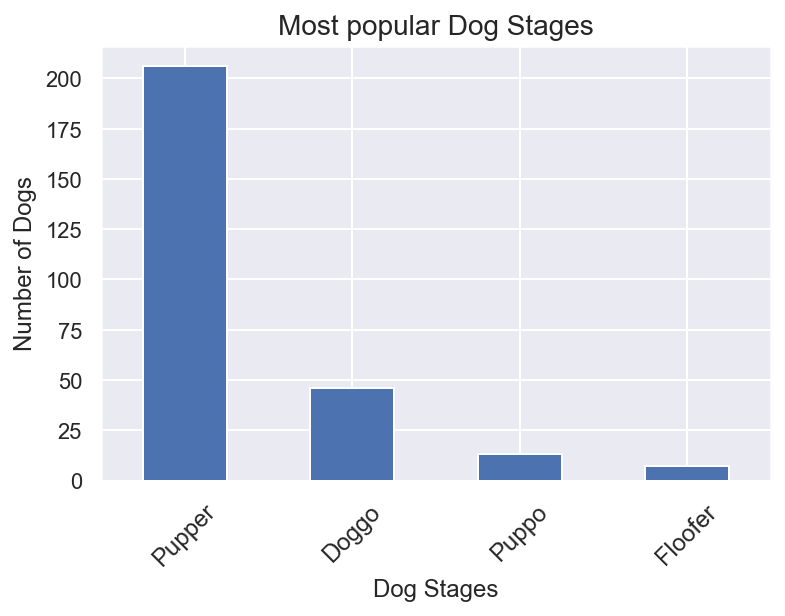

In [110]:
# The following chart will disply the most popular dog stages exist in our dataset

adj_ratings_df.dog_stage.value_counts().plot(kind='bar');
plt.title("Most popular Dog Stages", fontsize=14);
plt.xlabel('Dog Stages');
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Number of Dogs', fontsize=12)
plt.savefig('images/popular_dog_stages.pdf')
plt.show();

## Dog Stages Ranked by the Average of Rating

In [111]:
adj_ratings_df.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
Doggo      10.956522
Floofer    11.285714
Pupper     10.427184
Puppo      11.153846
Name: rating_numerator, dtype: float64

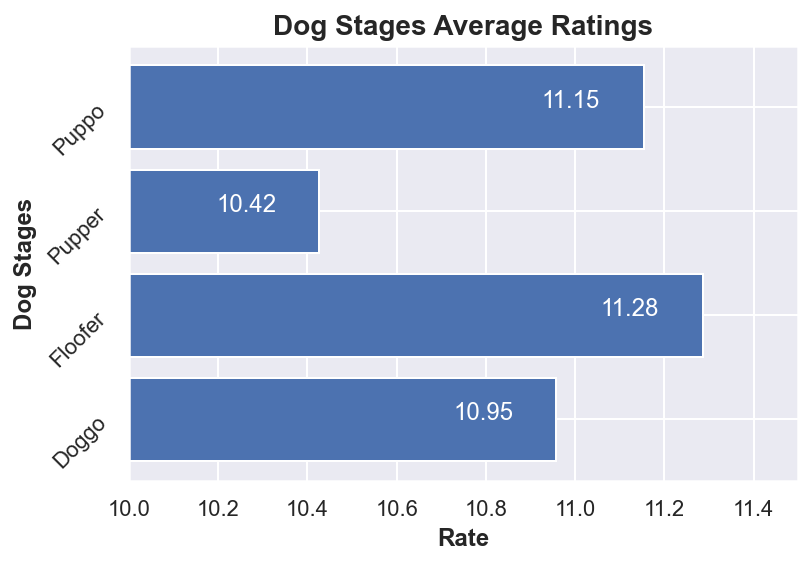

In [112]:
stage_by_rate = adj_ratings_df.groupby('dog_stage').rating_numerator.mean()
fig, ax = plt.subplots()
ax.barh(stage_by_rate.index, stage_by_rate.values)
plt.title("Dog Stages Average Ratings",fontsize=14, weight = 'bold');
plt.xlim(10, 11.5)
plt.yticks(rotation=45)
plt.xlabel('Rate',fontsize=12, weight = 'bold');
plt.ylabel('Dog Stages',fontsize=12, weight = 'bold')
for i, v in enumerate(stage_by_rate.values):
    ax.text(v-.23 , i , str(v)[:5], color='white')
plt.savefig('images/rank.pdf')
plt.show();

## Tweets sources in the dataset

In [113]:
# Tweets sources in the dataset
source = adj_ratings_df.source.value_counts()
source

Twitter for iPhone    1683
Vine                    73
Twitter Web Client      24
TweetDeck                9
Name: source, dtype: int64

In [114]:
# The percentage of each tweets sources in the dataset
for i in source.index:
    print(i, str(round((source[i]/adj_ratings_df.shape[0]) * 100))+'%')

Twitter for iPhone 94%
Vine 4%
Twitter Web Client 1%
TweetDeck 1%


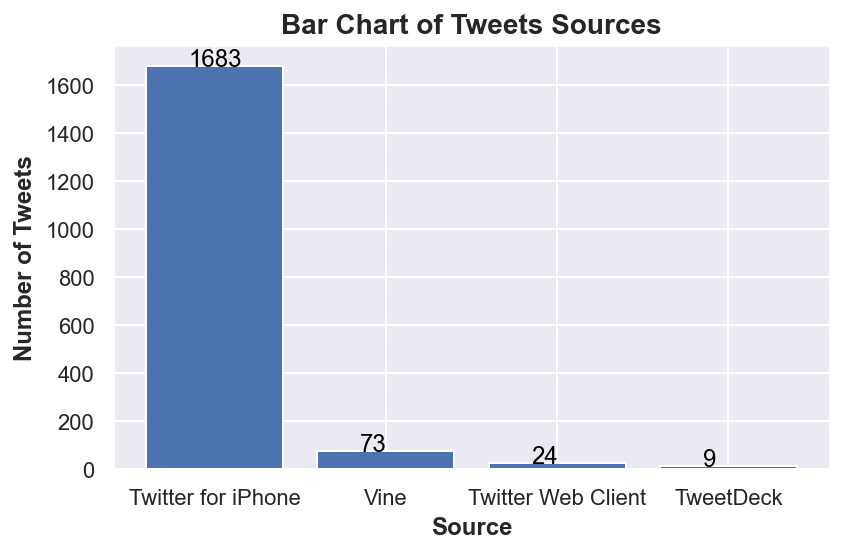

In [115]:
# Bar chart of tweets sources
source = adj_ratings_df.source.value_counts()
fig, ax = plt.subplots()
ax.bar(source.index, source.values)
plt.title('Bar Chart of Tweets Sources', weight= 'bold', fontsize = 14)
plt.xlabel('Source',fontsize=12, weight = 'bold')
plt.ylabel('Number of Tweets',fontsize=12, weight = 'bold')
for i, v in enumerate(source.values):
    ax.text(i-.15 , v ,v, color='black')
    
plt.tight_layout()
plt.savefig('images/tweet_source.pdf')

plt.show()

## Correlation Between `retweet_count`,`rating_numerator`,  and `likes_count` in a Heatmap

In [116]:
corr = adj_ratings_df[['retweet_count','rating_numerator', 'likes_count']]
corr.corr()

retweet_count  rating_numerator  likes_count
retweet_count          1.000000          0.217242     0.912977
rating_numerator       0.217242          1.000000     0.286705
likes_count            0.912977          0.286705     1.000000

In [117]:
corr = corr.corr()

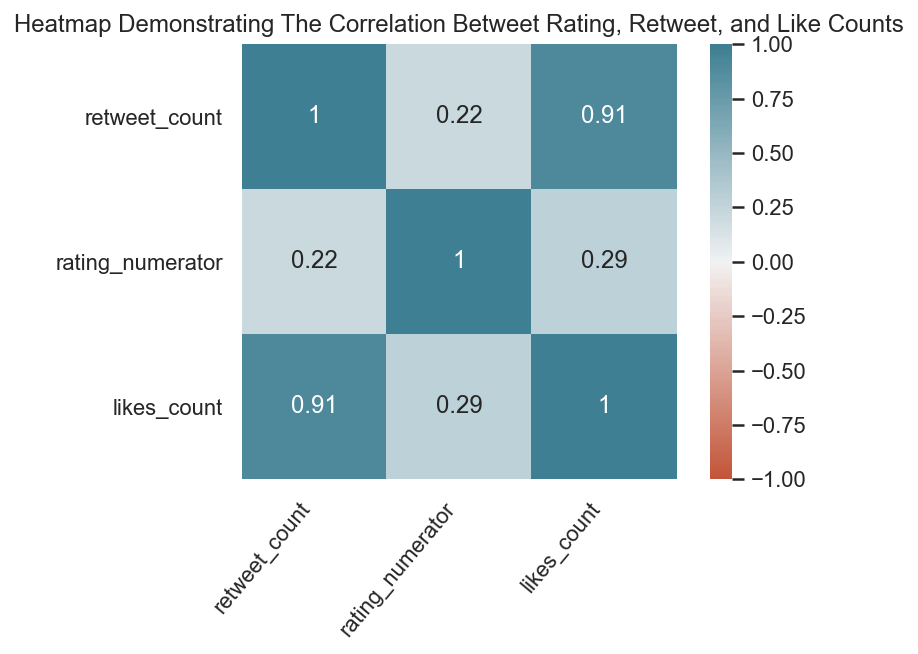

In [118]:

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);
plt.title('Heatmap Demonstrating The Correlation Betweet Rating, Retweet, and Like Counts')
plt.savefig('images/heatmap.pdf')
plt.show();


From the above heatmap we can see that there is a strong and postive correlation between the number of retweet and number of likes, while there is no Correlation between the those variables and ratings

## Popular Dogs' Names

In [119]:
adj_ratings_df.name.value_counts()[:10]

Lucy       9
Penny      9
Cooper     9
Charlie    8
Sadie      8
Winston    8
Oliver     7
Toby       6
Lola       6
Bailey     6
Name: name, dtype: int64

## Dogs' Genders

#### plot a pie chat to show the percentage of each gender among dogs

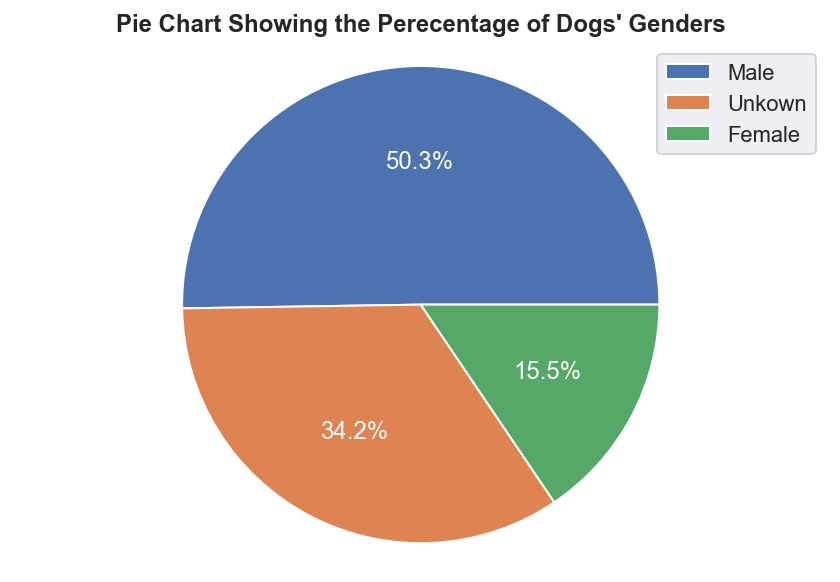

In [120]:
# Refrence 3

patches, _, autotexts = plt.pie(adj_ratings_df.dog_gender.value_counts(),  autopct='%1.1f%%');
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(patches, list(adj_ratings_df.dog_gender.value_counts().index), loc="best");
plt.axis('equal')
plt.tight_layout();
plt.title("Pie Chart Showing the Perecentage of Dogs' Genders", fontweight = "bold")
%config InlineBackend.figure_format = 'retina'
plt.savefig('images/figure.pdf')

## Find the average rating numerator per  each gender 

In [121]:
adj_ratings_df.groupby('dog_gender')['dog_gender','rating_numerator'].mean()

<ipython-input-121-9583af858349>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  adj_ratings_df.groupby('dog_gender')['dog_gender','rating_numerator'].mean()


rating_numerator
dog_gender                  
Female             10.737410
Male               10.140156
Unkown              9.800654

<a id='refrences'></a>
# Part VI - Refrences
- https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/
- https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
- https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart/54149203
